#### 3) precios de publicaciones agrupadas geograficamente por provincia/ciudad.
#### 3*) analisis de la distribucion de zonas caras a traves de los años.


In [ ]:
%matplotlib inline

import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot  as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader

from datetime import datetime

pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Creamos el dataframe y le asignamos como id del dataframe, el id de cada row del csv.
df = pd.read_csv('train_transformed.csv', index_col='id')

In [ ]:
df3 = df.copy()
df3 = df3[['lat','lng','precio']]
df3.dropna(inplace= True)

In [ ]:
# parametros segun https://www.naturalearthdata.com
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

#descargo el shape file de https://www.naturalearthdata.com
shpfilename = shapereader.natural_earth(resolution, category, name)
reader = shapereader.Reader(shpfilename)
countries = reader.records()

In [ ]:
poly = None

# busco y obtengo a mano el objeto de tipo Record de Mexico y obtengo su geometry (el contorno de Mexico)
for country in countries:
    if country.attributes['ADMIN'] == 'Mexico':
        poly = country.geometry

In [104]:
poly is None

False

In [ ]:
poly

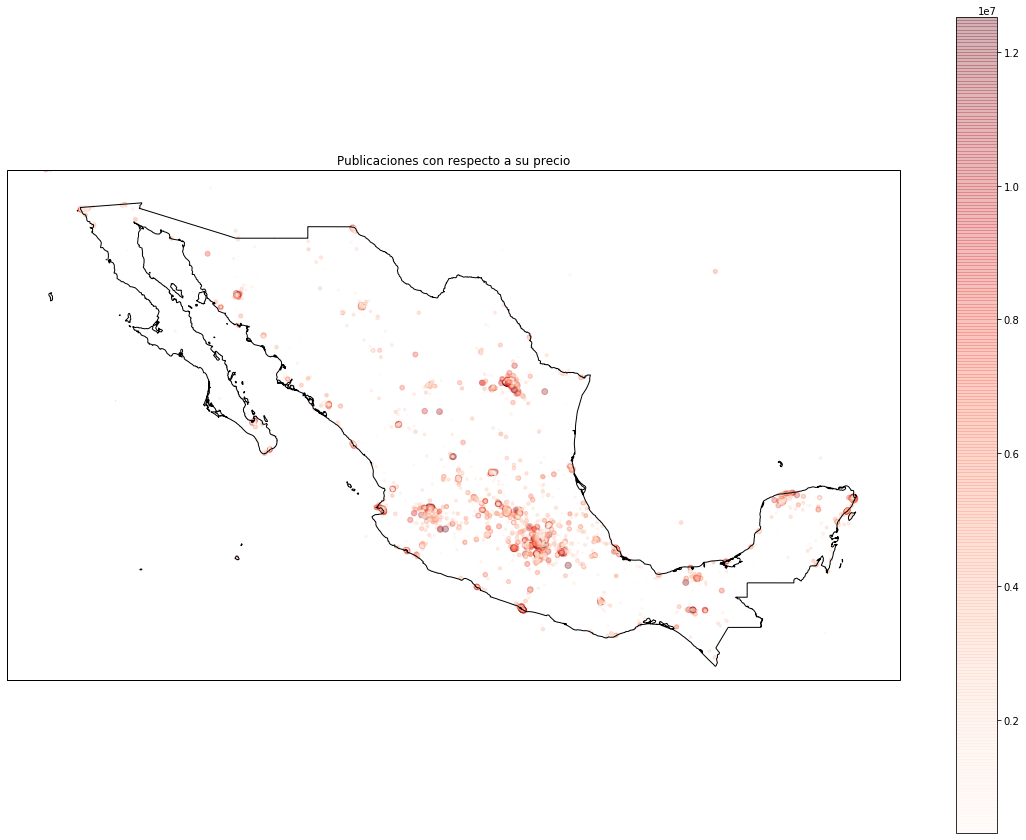

In [42]:
plt.figure(figsize = [20,15])

ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0')

df3.plot.scatter(x="lng", y="lat", s=df3['precio']/10**5.5,
                 c = df3['precio'], colorbar=True, ax=ax, alpha=0.3, cmap="Reds")
plt.title('Publicaciones con respecto a su precio')

#https://matplotlib.org/examples/color/colormaps_reference.html

#segun docu cmap https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# -> A Colormap instance or registered colormap name.
# cmap is only used if c is an array of floats. If None, defaults to rc image.cmap.

#Set the map on mexico's location
ax.set_extent([-120, -85, 14, 34], crs=ccrs.PlateCarree())

### Punto 3*

In [ ]:
#HACER OTRO MAPA PERO PARA DISTRITO FEDERAL QUE ES LA LOCALIDAD QUE MAS CONCENTRA.

In [ ]:
resolution = '10m'
category = 'cultural'
name = 'admin_1_states_provinces'

shpfilename = shapereader.natural_earth(resolution, category, name)
reader = shapereader.Reader(shpfilename)
countries = reader.records()

In [ ]:
poly = None
for country in countries:
    if country.attributes['admin'] == 'Mexico' and country.attributes['name'] == 'Distrito Federal':
        poly = country.geometry

In [104]:
poly is None

False

In [105]:
poly.bounds
# (minx, miny, maxx, maxy)
# (-99.33473222501215, 19.057803453166798, -98.93914913632358, 19.57105377900865)

# reordeno (minx, miny, maxx, maxy) A (minx, maxx, miny, maxy) 
# esto lo hago para que lo use la funcion "set_extent" que recibe de la forma (left, right, bottom, top)
# >> (-99.33473222501215,  -98.93914913632358, 19.057803453166798, , 19.57105377900865)

(-99.33473222501215, 19.057803453166798, -98.93914913632358, 19.57105377900865)

In [106]:
def graficar_mapa(df3):
    
    plt.figure(figsize = [15,15])

    ax = plt.axes(projection=ccrs.PlateCarree())

    ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', edgecolor='0')

    df3.plot(kind="scatter", x="lng", y="lat", s=df3['precio']/10**6,
                 c = df3['precio'], cmap="Reds", colorbar=True, ax=ax, alpha=0.5)
    plt.title('Location with respect to the sale price')

    ax.set_extent([-99.9, -98.3, 18.8, 19.8], crs=ccrs.PlateCarree())

In [60]:
df3 = df.copy()
df3 = df3.loc[df3.provincia == 'distrito federal']

df3 = df3[['lat','lng','precio']]
df3.dropna(inplace= True)

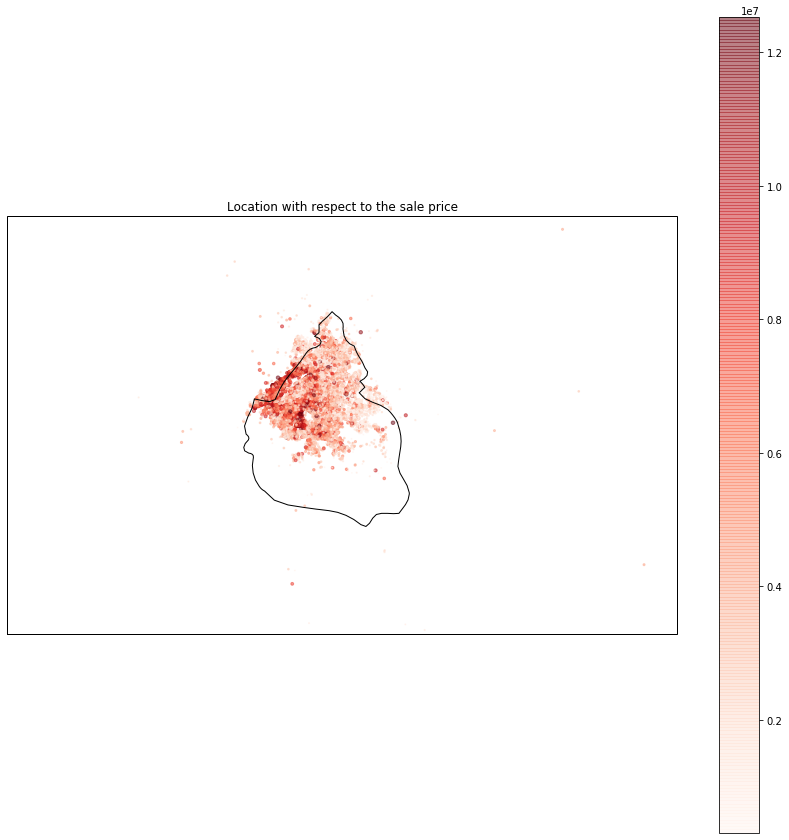

In [133]:
graficar_mapa(df3)

In [ ]:
#
# Se puede ver que la mayoria de las publicaciones estan en el centro y norte de DF.
# Se puede observar en el acumulado historico que el noroeste de DF tiene publicaciones con precios mas elevados
#

In [ ]:
#
#
#ANALIZAR LOS DISTINTOS AÑOS PARA AVERIGUAR SI LAS ZONAS CARAS A TRAVES DE LOS AÑOS FUERON CAMBIANDO
#
#

In [ ]:
df3 = df.copy()
df3 = df3.loc[df3.provincia == 'distrito federal']

df3 = df3[['lat','lng','precio','fecha']]
df3.dropna(inplace= True)

df3['fecha'] = df3['fecha'].apply(func = (lambda x :(datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))))
df3['year'] = df3['fecha'].apply(func = (lambda t : int(t.year)))

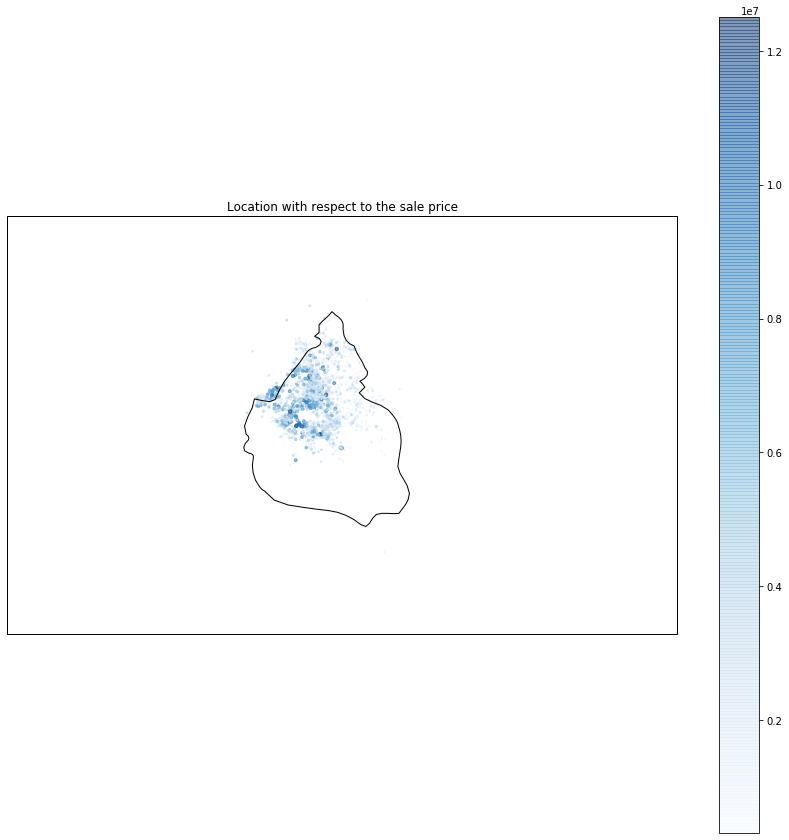

In [281]:
graficar_mapa(df3.loc[df3.year == 2012])

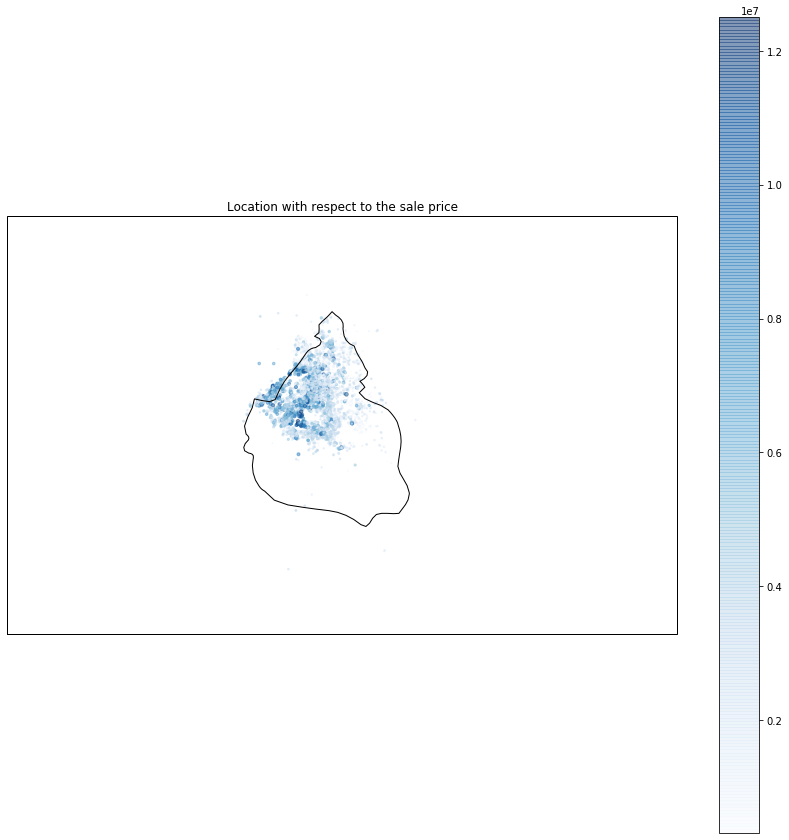

In [287]:
graficar_mapa(df3.loc[df3.year == 2013])

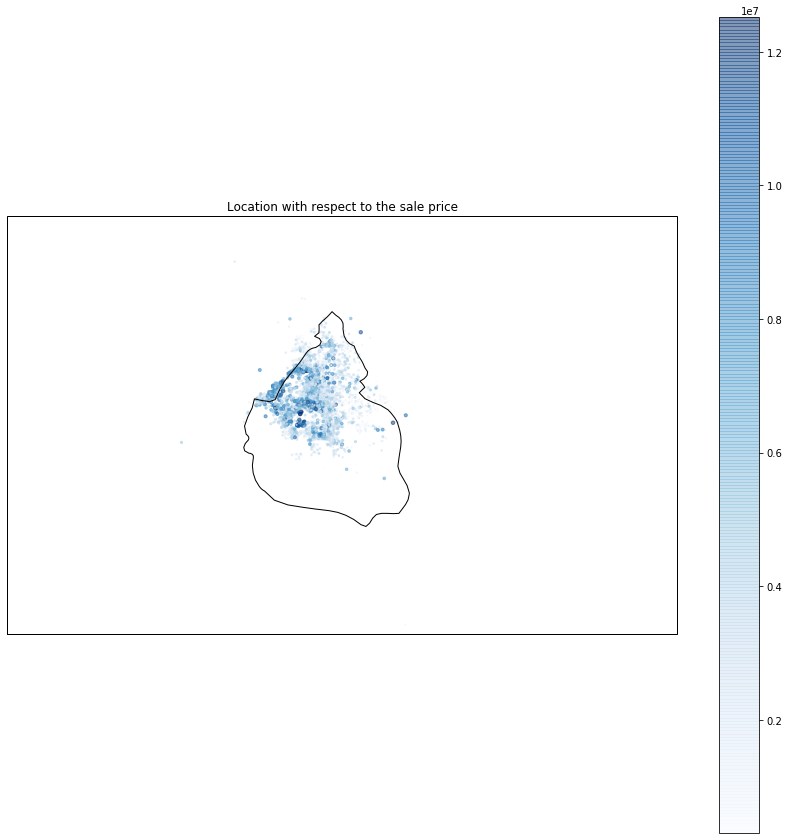

In [285]:
graficar_mapa(df3.loc[df3.year == 2014])

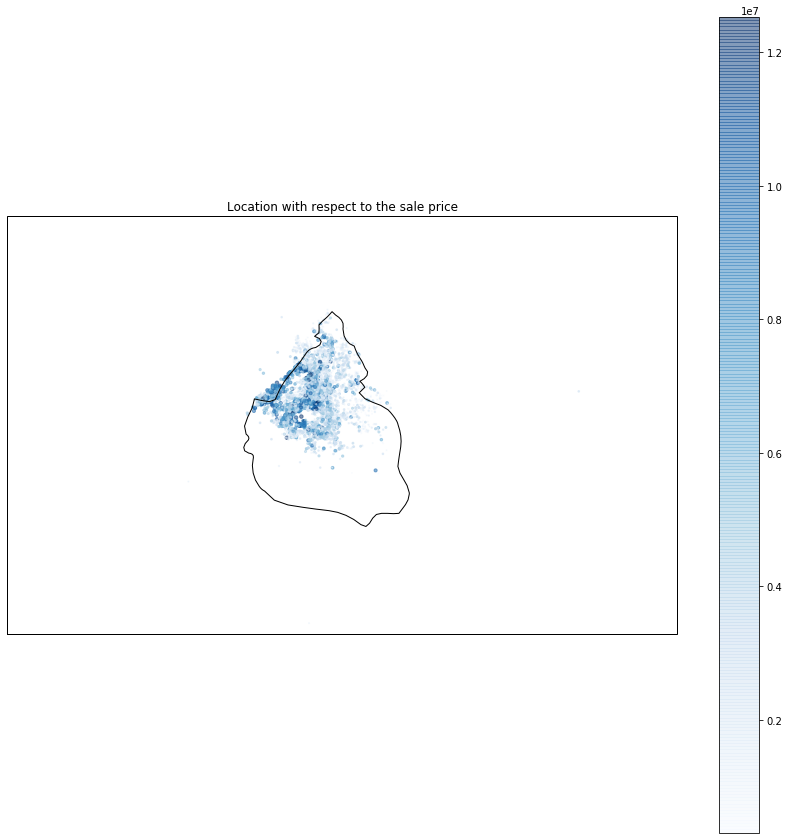

In [286]:
graficar_mapa(df3.loc[df3.year == 2015])

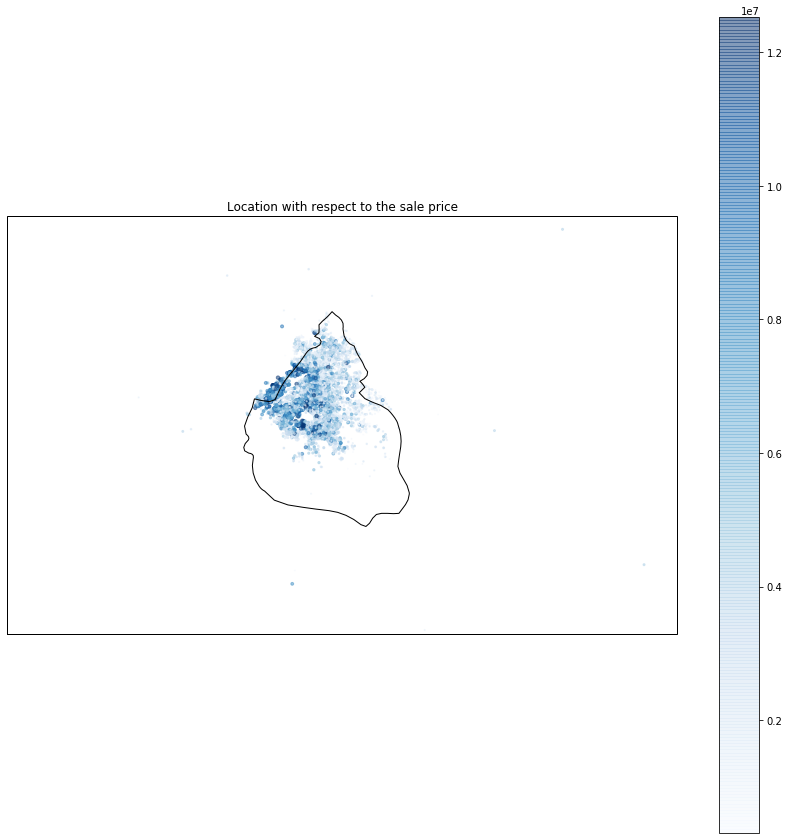

In [283]:
graficar_mapa(df3.loc[df3.year == 2016])

In [ ]:
#
# Podemos observar que la mayoria de las publicaciones a traves de los años siempre fueron de propiedades
# en el centro y noreste de DF, y ademas, se observa como el noroeste es levemente mas caro que el resto de DF.
#